<a href="https://colab.research.google.com/github/Shovan-1/CVPR-Summer-2025/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

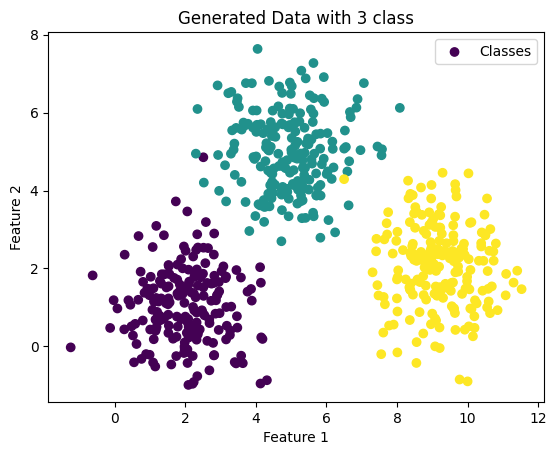

In [4]:
#Generate Random Data
def generate_data(sample_per_class=200):
    np.random.seed(42)

    #Class Create
    class1= np.random.randn(sample_per_class,2) + np.array([2,1])
    class2= np.random.randn(sample_per_class,2) + np.array([5,5])
    class3= np.random.randn(sample_per_class,2) + np.array([9,2])

    x=np.vstack((class1,class2,class3))
    y=np.array([0]*sample_per_class + [1]*sample_per_class + [2]*sample_per_class)
    return x,y

#Generate Data
x,y = generate_data()
#Data Visuaize
plt.scatter(x[:,0],x[:,1],c=y,cmap="viridis", label="Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Data with 3 class")
plt.legend()
plt.show()

In [6]:
# Preprocessing
# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the data  train, validation and test
X_train, X_temp, y_train, y_temp = train_test_split(x, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 360 samples
Validation set: 120 samples
Test set: 120 samples


In [27]:
# Define the Neural Network
class NeuralNet:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size, lr=0.001):
        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size1)
        self.W2 = np.random.randn(hidden_size1, hidden_size2)
        self.W3 = np.random.randn(hidden_size2, hidden_size3)
        self.W4 = np.random.randn(hidden_size3, hidden_size4)
        self.W5 = np.random.randn(hidden_size4, output_size)
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, x):
        # Layer 1
        self.hidden_input1 = np.dot(x, self.W1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)
        # Layer 4
        self.hidden_input4 = np.dot(self.hidden_output3, self.W4)
        self.hidden_output4 = self.sigmoid(self.hidden_input4)
        # Output Layer
        self.output_input = np.dot(self.hidden_output4, self.W5)
        self.output = self.sigmoid(self.output_input)
        return self.output

    def backprop(self, x, y, output):
        # Output Layer Error
        output_error = y - output
        output_delta = output_error * self.sigmoid(output, derivative=True)

        # Hidden Layer 4 Error
        hidden_error4 = np.dot(output_delta, self.W5.T)
        hidden_delta4 = hidden_error4 * self.sigmoid(self.hidden_output4, derivative=True)


        # Hidden Layer 3 Error
        hidden_error3 = np.dot(hidden_delta4, self.W4.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.hidden_output3, derivative=True)

        # Hidden Layer 2 Error
        hidden_error2 = np.dot(hidden_delta3, self.W3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, derivative=True)

        # Hidden Layer 1 Error
        hidden_error1 = np.dot(hidden_delta2, self.W2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, derivative=True)

        # Update weights
        self.W5 += np.dot(self.hidden_output4.T, output_delta) * self.lr
        self.W4 += np.dot(self.hidden_output3.T, hidden_delta4) * self.lr
        self.W3 += np.dot(self.hidden_output2.T, hidden_delta3) * self.lr
        self.W2 += np.dot(self.hidden_output1.T, hidden_delta2) * self.lr
        self.W1 += np.dot(x.T, hidden_delta1) * self.lr

    def train(self, x, y):
        output = self.feed_forward(x)
        self.backprop(x, y, output)

In [64]:
# Train NN
input_size = X_train.shape[1]
hidden_size1 = 30
hidden_size2 = 30
hidden_size3 = 30
hidden_size4 = 30
output_size = y_train.shape[1]
lr = 0.001
epochs = 151

nn = NeuralNet(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size, lr)
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    nn.train(X_train, y_train)
    train_output = nn.feed_forward(X_train)
    val_output = nn.feed_forward(X_val)

    # Compute loss
    train_loss = np.mean((y_train - train_output) ** 2)
    val_loss = np.mean((y_val - val_output) ** 2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Compute accuracy
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
              f"Train Accuracy = {train_accuracy * 100:.2f}%, Validation Accuracy = {val_accuracy * 100:.2f}%")



Epoch 0: Train Loss = 0.3678, Validation Loss = 0.3701, Train Accuracy = 32.50%, Validation Accuracy = 32.50%
Epoch 20: Train Loss = 0.1914, Validation Loss = 0.1913, Train Accuracy = 65.83%, Validation Accuracy = 67.50%
Epoch 40: Train Loss = 0.1642, Validation Loss = 0.1642, Train Accuracy = 69.72%, Validation Accuracy = 67.50%
Epoch 60: Train Loss = 0.1438, Validation Loss = 0.1442, Train Accuracy = 77.50%, Validation Accuracy = 75.00%
Epoch 80: Train Loss = 0.1295, Validation Loss = 0.1303, Train Accuracy = 81.11%, Validation Accuracy = 77.50%
Epoch 100: Train Loss = 0.1184, Validation Loss = 0.1196, Train Accuracy = 84.72%, Validation Accuracy = 80.83%
Epoch 120: Train Loss = 0.1083, Validation Loss = 0.1099, Train Accuracy = 87.22%, Validation Accuracy = 85.00%
Epoch 140: Train Loss = 0.0984, Validation Loss = 0.1005, Train Accuracy = 90.56%, Validation Accuracy = 88.33%


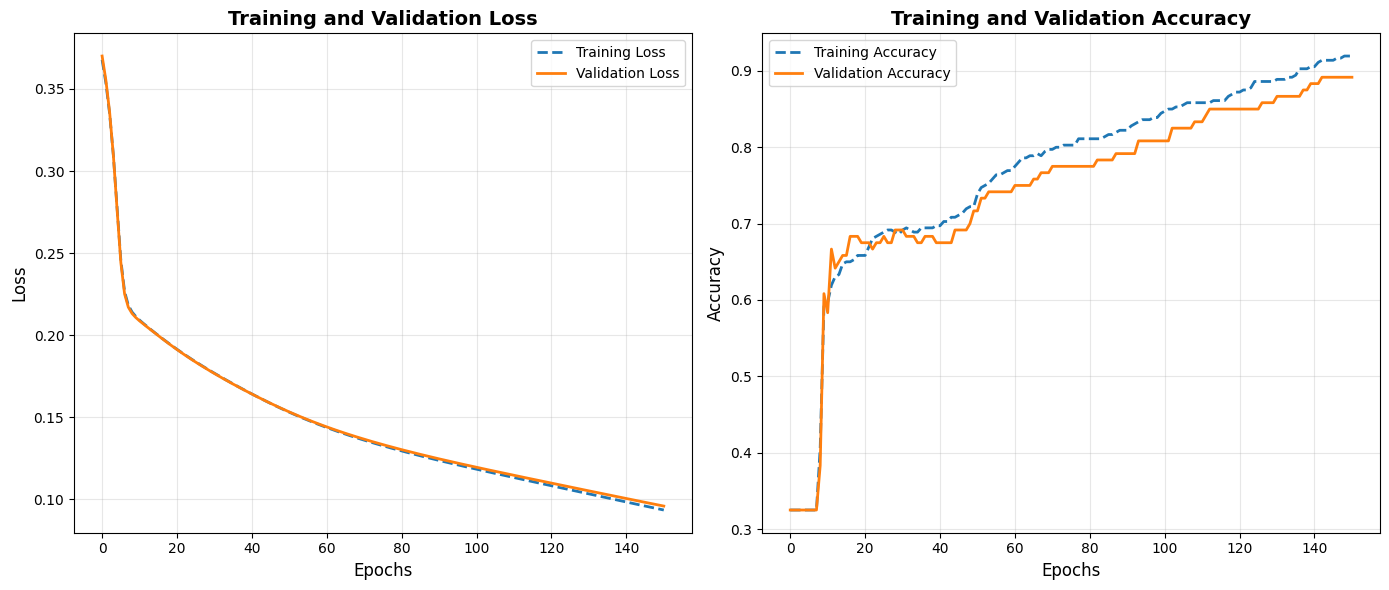

In [65]:
# Visualize Loss and Accuracy
import matplotlib.pyplot as plt

# Training and Validation Loss
plt.figure(figsize=(14, 6))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss", linestyle='--', linewidth=2)
plt.plot(val_losses, label="Validation Loss", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy", linestyle='--', linewidth=2)
plt.plot(val_accuracies, label="Validation Accuracy", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [66]:
# Evaluate the Model
test_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

In [67]:
# Accuracy
test_accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 93.33%


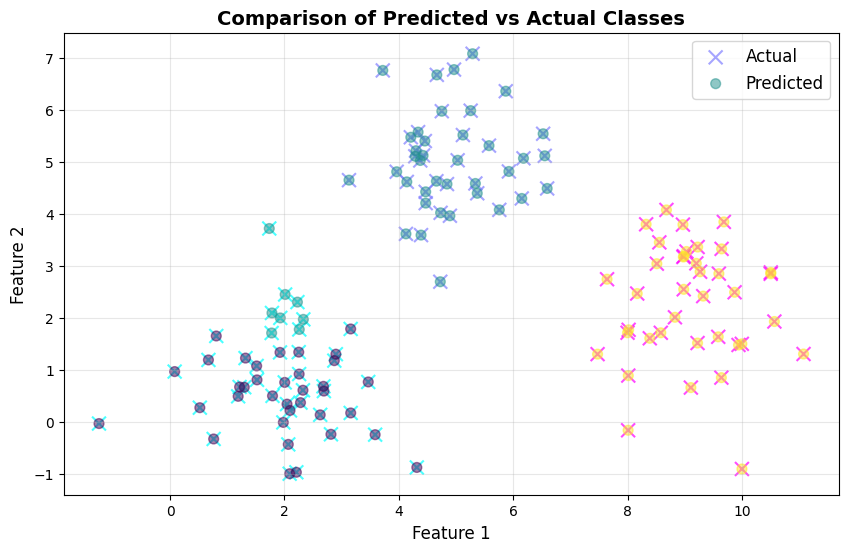

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap="cool", marker="x", s=100, alpha=0.7, label="Actual")
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap="viridis", marker="o", s=50, alpha=0.5, label="Predicted")
plt.title("Comparison of Predicted vs Actual Classes", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()